## Length of the code {-}
No restriction

**Delete this section from the report, when using this template.** 

In [101]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import itertools
water = pd.read_csv('drinking_water_potability.csv')
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Data quality check / cleaning / preparation 

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.** An example is given below.

### Data quality check
*By Elton John*

The code below visualizes the distribution of all the variables in the dataset, and their association with the response.

Text(0.5, 0, 'Turbidity')

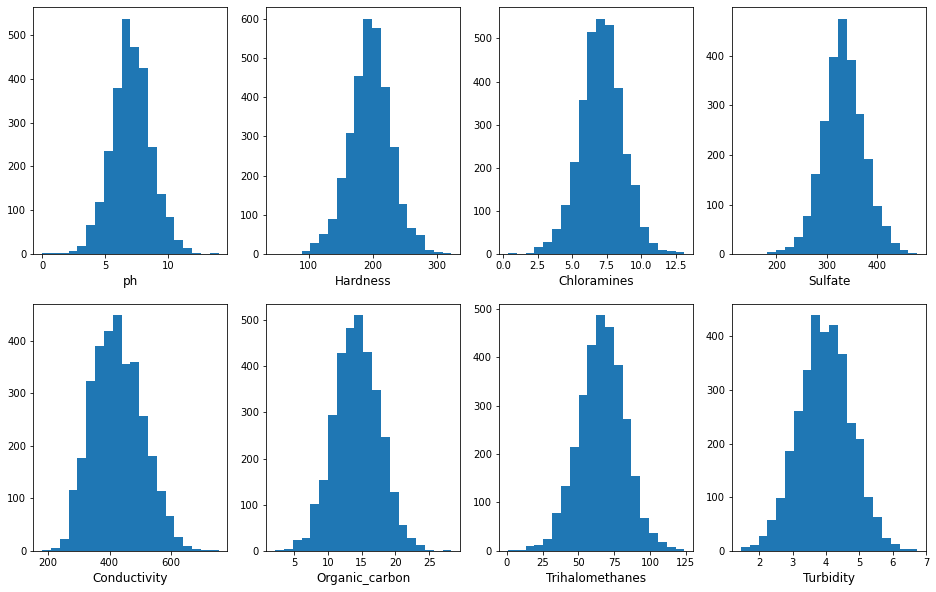

In [15]:
#...Distribution of continuous variables...#
fig, axes = plt.subplots(2,4,figsize=(16,10))
plt.subplots_adjust(wspace=0.2)
axes[0,0].hist(x ="ph", data = water, bins = 20)
axes[0,0].set_xlabel("ph",fontsize = 12)
axes[0,1].hist(x = "Hardness", data = water, bins = 20)
axes[0,1].set_xlabel("Hardness",fontsize = 12)
axes[0,2].hist(x = "Chloramines", data = water, bins = 20)
axes[0,2].set_xlabel("Chloramines",fontsize = 12)
axes[0,3].hist(x = "Sulfate", data = water, bins = 20)
axes[0,3].set_xlabel("Sulfate",fontsize = 12)
axes[1,0].hist(x = "Conductivity", data = water, bins = 20)
axes[1,0].set_xlabel("Conductivity",fontsize = 12)
axes[1,1].hist(x = "Organic_carbon", data = water, bins = 20)
axes[1,1].set_xlabel("Organic_carbon",fontsize = 12)
axes[1,2].hist(x = "Trihalomethanes", data = water, bins = 20)
axes[1,2].set_xlabel("Trihalomethanes",fontsize = 12)
axes[1,3].hist(x = "Turbidity", data = water, bins = 20)
axes[1,3].set_xlabel("Turbidity",fontsize = 12)

<AxesSubplot:xlabel='Potability', ylabel='Count'>

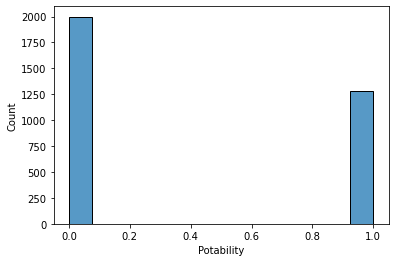

In [3]:
#...Distribution of categorical variables...#
sns.histplot(x ="Potability", data = water)

In [ ]:
water.Potability.value_counts(1)

In [9]:
#...Association of the response with the predictors...#

### Data cleaning
*By Xena Valenzuela*

From the data quality check we realized that:

1. Some of the columns that should have contained only numeric values, specifically <>, <>, and <> have special characters such as \*, #, %. We'll remove these characters, and convert the datatype of these columns to numeric.

2. Some of the columns have more than 60% missing values, and it is very difficult to impute their values, as the values seem to be missing at random with negligible association with other predictors. We'll remove such columns from the data.

3. The column `number_of_bedrooms` has some unreasonably high values such as 15. As our data consist of single-family homes in Evanston, we suspect that any value greater than 5 may be incorrect. We'll replace all values that are greater than 5 with an estimate obtained using the $K$-nearest neighbor approach.

4. The columns `house_price` has some unreasonably high values. We'll tag all values greater than 1 billion dollars as "potentially incorrect observation", to see if they distort our prediction / inference later on.

The code below implements the above cleaning.

In [ ]:
#...Code with comments...#

### Data preparation
*By Sankaranarayanan Balasubramanian and Chun-Li*

The following data preparation steps helped us to prepare our data for implementing various modeling / validation techniques:

1. Since we need to predict house price, we derived some new predictors *(from existing predictors)* that intuitively seem to be helpuful to predict house price. 

2. We have shuffled the dataset to prepare it for K-fold cross validation.

3. We have created a standardized version of the dataset, as we will use it to develop Lasso / Ridge regression models.

In [3]:
######---------------Creating new predictors----------------#########

#Creating number of bedrooms per unit floor area

#Creating ratio of bathrooms to bedrooms

#Creating ratio of carpet area to floor area

In [ ]:
######-----------Shuffling the dataset for K-fold------------#########

In [ ]:
######-----Standardizing the dataset for Lasso / Ridge-------#########

In [102]:
#Dropping any rows with missing values
water = water.dropna()

In [103]:
#Shuffling the dataset for random selection of train and test data
np.random.seed(2)
# 80% to be training
train = water.sample(round(water.shape[0]*.8))
# drop the train data from the test df
test = water.drop(train.index)

## Exploratory data analysis

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

*By Tyler McLaughlin*

In [ ]:
#Examining relationship of explanatory variable (ph) with Potability
sns.boxplot(x = "Potability", y="ph", data = water)

In [ ]:
#Examining relationship of explanatory variable (Hardness) with Potability
sns.boxplot(x = "Potability", y="Hardness", data = water)

In [ ]:
#Examining relationship of explanatory variable (Solids) with Potability
sns.boxplot(x = "Potability", y="Solids", data = water)

In [ ]:
#Examining relationship of explanatory variable (Chloramines) with Potability
sns.boxplot(x = "Potability", y="Chloramines", data = water)

In [ ]:
#Examining relationship of explanatory variable (Suflate) with Potability
sns.boxplot(x = "Potability", y="Sulfate", data = water)

In [ ]:
#Examining relationship of explanatory variable (Conductivity) with Potability
sns.boxplot(x = "Potability", y="Conductivity", data = water)

In [ ]:
#Examining relationship of explanatory variable (Organic_Carbon) with Potability
sns.boxplot(x = "Potability", y="Organic_carbon", data = water)

In [ ]:
#Examining relationship of explanatory variable (Turbidity) with Potability
sns.boxplot(x = "Potability", y="Turbidity", data = water)

In [ ]:
#Examining relationships between the explanatory variables (Scatterplot matrix)
sns.pairplot(water)

In [ ]:
#Examining relationships between the explanatory variables (Correlation heatmap)
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(water.corr())

## Developing the model

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

### Functions for Confusion Matrix, Classification Accuracy, Plotting Subset Selection
*By Malva de Boor*

In [71]:
def confusion_matrix_test(data,actual_values,model,cutoff=0.5):
    #Predicting the values using the Logit model
    pred_values = model.predict(data)
    #Specifying the bins for the predicted probabilities
    bins=np.array([0,cutoff,1])
    #Creating the confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    #Displaying the confusion matrix
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    return cm

#This function is the same as the one above except it returns the accuracy instead
#of the confusion matrix for easier use in variable selection later
def accuracytest(data,actual_values,model,cutoff=0.5):
    pred_values = model.predict(data)
    bins=np.array([0,cutoff,1])
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    return accuracy

def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})
    
    #Plotting selection based on Accuracy
    plt.subplot(2, 2, 1)
    accuracy = models_best.apply(lambda row: accuracytest(test,test.Potability,row[1],cutoff=0.5), axis=1)
    plt.plot(models_best["Accuracy"])
    plt.plot(1+accuracy.argmax(), accuracy.max(), "or") #plotting red dot on maximum
    plt.xlabel('# Predictors')
    plt.ylabel('Accuracy')
    
    #Plotting selection based on AIC
    plt.subplot(2, 2, 2)
    aic = models_best.apply(lambda row: row[1].aic, axis=1)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or") #plotting red dot on minimum
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')
    
    #Plotting selection based on BIC
    plt.subplot(2, 2, 3)
    bic = models_best.apply(lambda row: row[1].bic, axis=1)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or") #plotting red dot on minimum
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')

def processSubset(predictor_subset):
    #Fit model on feature_set and calculate classification accuracy
    #Model including all predictors in predictor_subset
    model = sm.logit('Potability~' + '+'.join(predictor_subset),data = train).fit() 
    accuracy = accuracytest(test,test.Potability,model,cutoff=0.5)
    return {"model":model, "Accuracy":accuracy}

### Baseline Model
*By Malva de Boor*

Optimization terminated successfully.
         Current function value: 0.672501
         Iterations 4
Classification accuracy = 59.8%
FPR = 0.25%


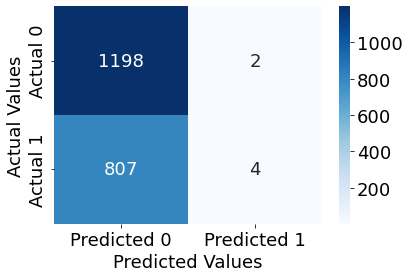

In [72]:
#Making a logistic model with all the predictors
logit_model = sm.logit(formula = 'Potability~ph+Hardness+Solids+Chloramines+Sulfate+\
                Organic_carbon+Conductivity+Turbidity+Trihalomethanes', data = water).fit() 
logit_model.summary()
#Displaying the confusion matrix and the FPR of the model
cm = confusion_matrix_test(water,water.Potability,logit_model,.5)
fpr = cm[0,1]/(cm[0,1]+cm[1,0])
print('FPR = {:.2%}'.format(fpr))

### Forward Selection 
*By Malva de Boor*

In [73]:
#Eliminating dataframe reassignment errors
pd.set_option('mode.chained_assignment', None)
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

In [105]:
#Creating a dataframe with all the predictors
X = train.loc[:, train.columns!='Potability']
train2 = train.copy()
test2 = test.copy()
#backup X
X_backup = train.loc[:, train.columns!='Potability']
#Including 2-factor interactions of predictors in train and 'X'. 
for combo in itertools.combinations(X_backup.columns, 2):    
    train['_'.join(combo)] = train[combo[0]]*train[combo[1]]
    test['_'.join(combo)] = test[combo[0]]*test[combo[1]]
    X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)]

Optimization terminated successfully.
         Current function value: 0.676568
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.676692
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.675115
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.676696
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.676274
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.676614
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.676644
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.676702
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.676556
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.676697
  

Optimization terminated successfully.
         Current function value: 0.675486
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.674692
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.674728
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.674273
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.673929
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.674519
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.674065
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.674663
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.674740
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.674617
  

Optimization terminated successfully.
         Current function value: 0.665825
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.665677
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.641004
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.665524
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.665894
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.665951
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.665842
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.664659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.664509
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.664157
  

Optimization terminated successfully.
         Current function value: 0.664392
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.640962
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.664211
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.661990
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.650681
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.664576
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.663631
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.662991
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.663009
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.655345
  

Optimization terminated successfully.
         Current function value: 0.662961
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.655212
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.664625
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.661105
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.658023
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.663812
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.664644
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.657447
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.664575
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.663993
  

Optimization terminated successfully.
         Current function value: 0.660173
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.660570
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.660289
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.647388
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.659990
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.660540
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.656061
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.660551
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.660492
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.652554
  

Optimization terminated successfully.
         Current function value: 0.652241
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.651794
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.628033
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.652684
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.656337
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.642565
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.657753
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.655603
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.657314
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.649170
  

Optimization terminated successfully.
         Current function value: 0.641154
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.637295
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.641596
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.648352
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.651447
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.650174
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.652339
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.647540
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.635663
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.635423
  

Optimization terminated successfully.
         Current function value: 0.630925
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.633966
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.634314
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.635552
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.635577
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.635641
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.634609
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.635333
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.635070
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.623481
  

Optimization terminated successfully.
         Current function value: 0.634233
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.620981
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.633987
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.631375
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.634194
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.634591
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.633787
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.627950
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.633752
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.634168
  

Optimization terminated successfully.
         Current function value: 0.634761
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.634807
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.633707
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.631603
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609577
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.631760
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.627597
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.631798
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.632315
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.631017
  

Optimization terminated successfully.
         Current function value: 0.617538
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.616777
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.619996
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.621132
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.621086
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.621097
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.620653
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.607193
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.620525
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.618926
  

Optimization terminated successfully.
         Current function value: 0.613190
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615607
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605362
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.614456
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615336
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.613527
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.613112
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612690
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615236
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605212
  

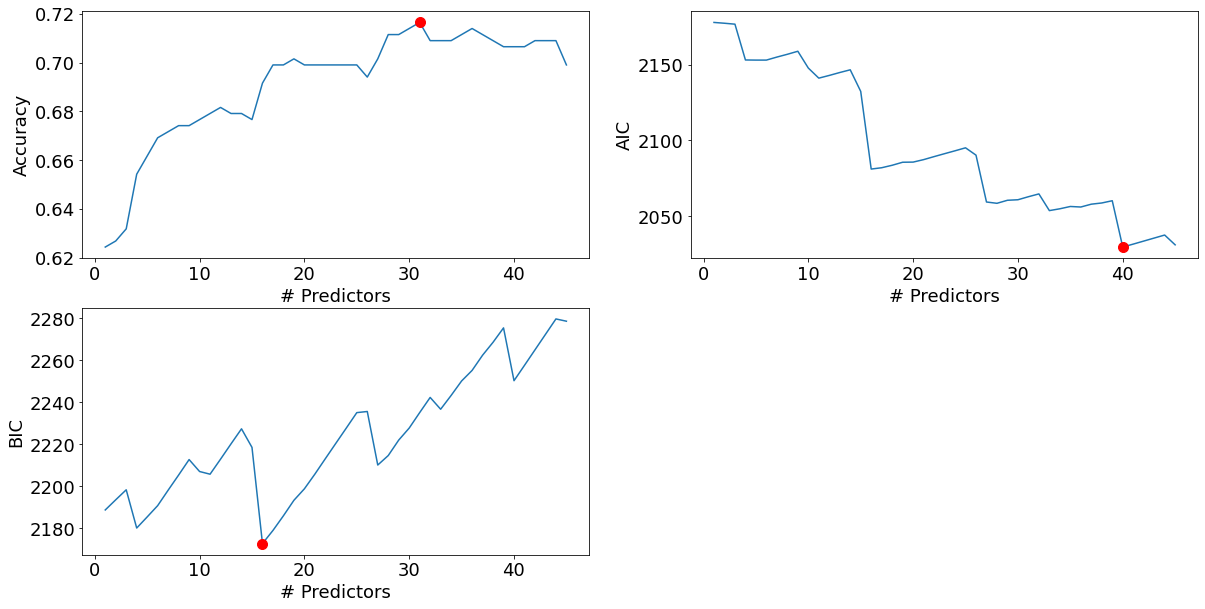

In [106]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors that still haven't been added to the model
    remaining_predictors = [p for p in X.columns if p not in predictors]
    results = []
    
    #making a model for every possible new predictor
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))

    models = pd.DataFrame(results)
    
    #Choose the model with the highest Accuracy
    best_model = models.loc[models['Accuracy'].argmax()]

    #Return the best model
    return best_model

def forward_selection():
    models_best = pd.DataFrame(columns=["Accuracy", "model"])

    predictors = []
    
    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors) #calling forward selection
        #setting predictors in model equal to the ones used in the current iteration in
        #preparation for the next iteration
        predictors = list(models_best.loc[i]["model"].params.index[1:])  
    return models_best

models_best = forward_selection()
best_sub_plots() #plot the results

In [107]:
#Finding the number of predictors that maximized Accuracy and minimized AIC and BIC
print("Accuracy:",models_best.Accuracy.loc[models_best.Accuracy == models_best.Accuracy.max()].index[0])
print("AIC:",models_best.apply(lambda row: row[1].aic, axis=1).idxmin())
print("BIC:",models_best.apply(lambda row: row[1].bic, axis=1).idxmin())

Accuracy: 31
AIC: 40
BIC: 16


Classification accuracy = 71.6%
Recall: 38.8% FPR: 8.4%


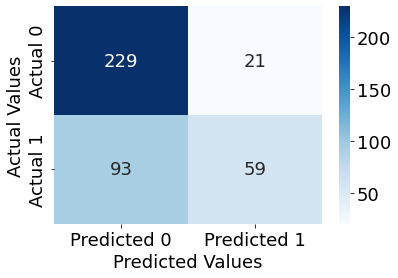

In [109]:
#Best model based on classification accuracy
cm = confusion_matrix_test(test,test.Potability,models_best.loc[31,'model'],cutoff=0.5)
recall = cm[1,1]/(cm[1,1]+cm[1,0])
fpr = cm[0,1]/(cm[0,1]+cm[0,0])
print('Recall: {:.1%}'.format(recall),'FPR: {:.1%}'.format(fpr))

Classification accuracy = 70.6%
Recall: 37.5% FPR: 9.2%


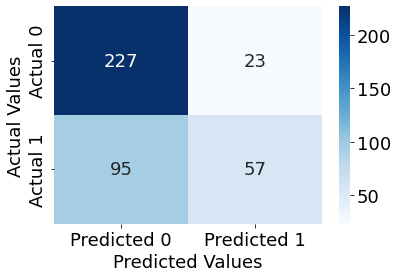

In [110]:
#Best model based on AIC
cm = confusion_matrix_test(test,test.Potability,models_best.loc[40,'model'],cutoff=0.5)
recall = cm[1,1]/(cm[1,1]+cm[1,0])
fpr = cm[0,1]/(cm[0,1]+cm[0,0])
print('Recall: {:.1%}'.format(recall),'FPR: {:.1%}'.format(fpr))

Classification accuracy = 69.2%
Recall: 29.6% FPR: 6.8%


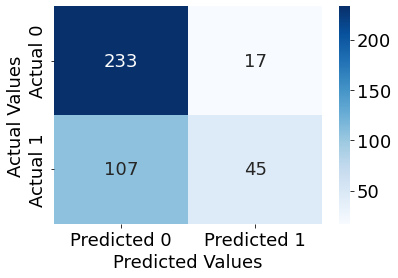

In [111]:
#Best model based on BIC 
cm = confusion_matrix_test(test,test.Potability,models_best.loc[16,'model'],cutoff=0.5)
recall = cm[1,1]/(cm[1,1]+cm[1,0])
fpr = cm[0,1]/(cm[0,1]+cm[0,0])
print('Recall: {:.1%}'.format(recall),'FPR: {:.1%}'.format(fpr))

### Backward Selection
*By Henry Shavel*

Optimization terminated successfully.
         Current function value: 0.602561
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602562
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602561
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602614
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602594
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603384
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603158
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602566
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603005
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602604
  

Optimization terminated successfully.
         Current function value: 0.603853
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603137
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602986
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602960
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603764
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608538
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603252
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605897
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603044
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605893
  

Optimization terminated successfully.
         Current function value: 0.603087
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603104
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.628381
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615077
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608466
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603889
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603182
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603006
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602983
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603774
  

Optimization terminated successfully.
         Current function value: 0.603066
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603149
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603159
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.628417
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615208
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608523
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603942
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603269
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603069
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603081
  

Optimization terminated successfully.
         Current function value: 0.603193
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.628907
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615210
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608584
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603990
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603439
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603093
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603128
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603887
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612218
  

Optimization terminated successfully.
         Current function value: 0.608628
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609426
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.618812
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608869
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.614733
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608674
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615555
         Iterations 6
Processed  36 models on 35 predictors in 2.900846242904663 seconds.
Optimization terminated successfully.
         Current function value: 0.608659
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608692
         Iterations 6
Optimization t

Optimization terminated successfully.
         Current function value: 0.609486
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609352
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609049
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609170
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609259
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609097
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609135
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.620235
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611295
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609231
  

Optimization terminated successfully.
         Current function value: 0.640135
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.620822
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610995
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609542
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609391
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609529
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610230
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.619366
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610016
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.616738
  

Optimization terminated successfully.
         Current function value: 0.609937
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610381
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610303
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609665
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609606
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609764
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.640151
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.620880
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611183
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609662
  

Optimization terminated successfully.
         Current function value: 0.610504
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609957
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.640523
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.621171
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611316
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609745
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609770
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610030
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610998
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.624485
  

Optimization terminated successfully.
         Current function value: 0.617361
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.620200
         Iterations 6
Processed  22 models on 21 predictors in 1.125288963317871 seconds.
Optimization terminated successfully.
         Current function value: 0.610836
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610329
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611316
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610206
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609968
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.621142
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612144
         Iterations 6
Optimization t

Optimization terminated successfully.
         Current function value: 0.621613
         Iterations 6
Processed  18 models on 17 predictors in 0.838435173034668 seconds.
Optimization terminated successfully.
         Current function value: 0.612938
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612973
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612978
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.622975
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.614792
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615785
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612840
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612821
         Iterations 6
Optimization t

Optimization terminated successfully.
         Current function value: 0.618352
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.616202
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.618418
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.656225
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.628629
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.628665
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.628404
         Iterations 6
Processed  12 models on 11 predictors in 0.41932010650634766 seconds.
Optimization terminated successfully.
         Current function value: 0.628694
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.618913
         Iterations 6
Optimization

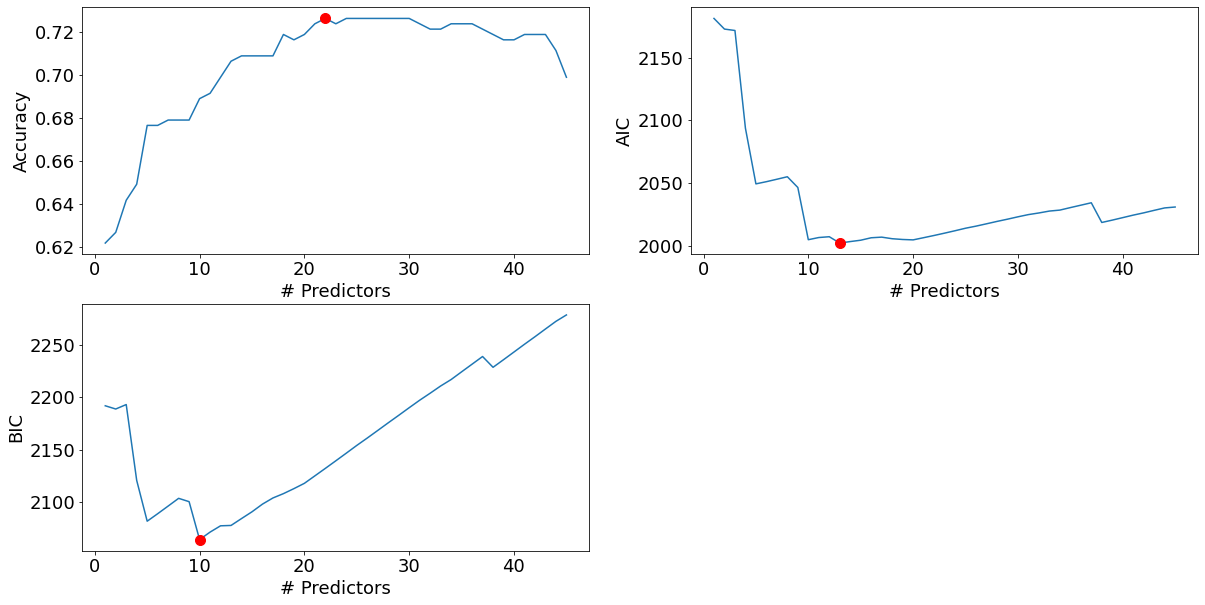

In [83]:
#backward
import time
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Accuracy'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model
def backward_selection():
    models_best = pd.DataFrame(columns=["Accuracy", "model"], index = range(1,len(X.columns)))

    tic = time.time()
    predictors = X.columns
    models_best.loc[len(predictors)] = processSubset(predictors)
    
    while(len(predictors) > 1):  
        models_best.loc[len(predictors)-1] = backward(predictors)
        predictors = models_best.loc[len(predictors)-1]["model"].params.index[1:]

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

models_best = backward_selection()
best_sub_plots()

In [84]:
#Finding the number of predictors that maximized Accuracy and minimized AIC and BIC
print("Accuracy:",models_best.Accuracy.loc[models_best.Accuracy == models_best.Accuracy.max()].index[0])
print("AIC:",models_best.apply(lambda row: row[1].aic, axis=1).idxmin())
print("BIC:",models_best.apply(lambda row: row[1].bic, axis=1).idxmin())

Accuracy: 22
AIC: 13
BIC: 10


Classification accuracy = 72.6%
Recall: 40.1% FPR: 7.6%
Classification accuracy = 70.6%
Recall: 37.5% FPR: 9.2%
Classification accuracy = 68.9%
Recall: 33.6% FPR: 9.6%


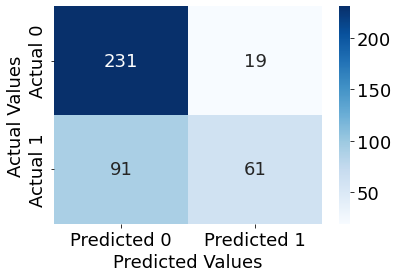

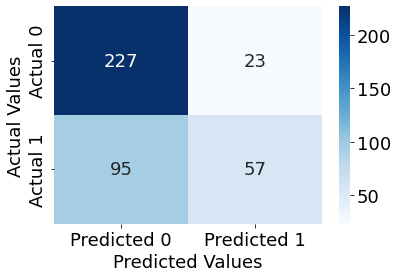

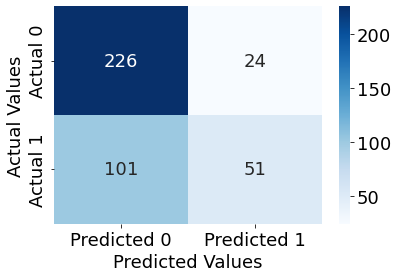

In [100]:
#Best model based on classification accuracy
cm = confusion_matrix_test(test,test.Potability,models_best.loc[22,'model'],cutoff=0.5)
recall = cm[1,1]/(cm[1,1]+cm[1,0])
fpr = cm[0,1]/(cm[0,1]+cm[0,0])
print('Recall: {:.1%}'.format(recall),'FPR: {:.1%}'.format(fpr))
plt.figure()
#Best model based on AIC
cm = confusion_matrix_test(test,test.Potability,models_best.loc[13,'model'],cutoff=0.5)
recall = cm[1,1]/(cm[1,1]+cm[1,0])
fpr = cm[0,1]/(cm[0,1]+cm[0,0])
print('Recall: {:.1%}'.format(recall),'FPR: {:.1%}'.format(fpr))
plt.figure()
#Best model based on classification accuracy
cm = confusion_matrix_test(test,test.Potability,models_best.loc[10,'model'],cutoff=0.5)
recall = cm[1,1]/(cm[1,1]+cm[1,0])
fpr = cm[0,1]/(cm[0,1]+cm[0,0])
print('Recall: {:.1%}'.format(recall),'FPR: {:.1%}'.format(fpr))

In [99]:
best_in_model = models_best.loc[22,'model']
accuracy = np.array([])
for i in X_backup.columns:
    model = sm.logit("Potability~" + "+".join(best_in_model.params.index[1:]) + "+I(" + i + "**2)+I(" + i + "**3)", data = train).fit()
    accuracy = np.append(accuracy,accuracytest(test,test.Potability,model,cutoff=0.5))
print(round(max(accuracy)*100,1),'%')

Optimization terminated successfully.
         Current function value: 0.602492
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605929
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609496
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606043
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.595655
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.609315
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608428
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609450
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609710
         Iterations 6
72.6 %


### Code fitting the final model

Put the code(s) that fit the final model(s) in separate cell(s), i.e., the code with the `.ols()` or `.logit()` functions.

## Conclusions and Recommendations to stakeholder(s)

You may or may not have code to put in this section. Delete this section if it is irrelevant.